 ## Remarque : 
        - L'execution ( les résultats ) affichés ne convient pas avec les données parceque on a changé le nombres de fichiers Json utilisés avant qu'on vous transmet le projet . 
        - il faut reéxecuter le code avec le nombre de fichiers souhaités pour avoir des bons résultat
        - les parties ambigué et la ou on a trouvé des problems on les a marqué par des commentaires 
        
#//////////////////////////////////////////////////////////////

#//////////////////////////////////////////////////////////////

#//////////////////////////////////////////////////////////////

#les remarque sont écrit de cette forme

#//////////////////////////////////////////////////////////////

#//////////////////////////////////////////////////////////////

#//////////////////////////////////////////////////////////////


# COVID-19 Literature Clustering

# Table of Contents
1. Loading the data
2. Pre-processing
3. Vectorization
4. PCA  & Clustering
5. Dimensionality Reduction with t-SNE
6. Topic Modeling on Each Cluster
7. Classify
8. Plot
9. How to Use the Plot?
10. Conclusion
11. Citation/Sources

<br>

# Loading the Data


https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

### Loading Metadata

In [152]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Let's load the metadata of the dateset. 'title' and 'journal' attributes may be useful later when we cluster the articles to see what kinds of articles cluster together.

In [153]:
root_path = 'C:/Users/Seyf_GOUMEIDA/Documents/GitHub/archive'
#root_path = 'C:/Users/moham/Downloads/archive'

metadata_path = f'{root_path}/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

In [154]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522159 entries, 0 to 522158
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          522159 non-null  object 
 1   sha               176592 non-null  object 
 2   source_x          522159 non-null  object 
 3   title             521918 non-null  object 
 4   doi               287709 non-null  object 
 5   pmcid             186262 non-null  object 
 6   pubmed_id         248397 non-null  object 
 7   license           522159 non-null  object 
 8   abstract          379944 non-null  object 
 9   publish_time      521940 non-null  object 
 10  authors           507699 non-null  object 
 11  journal           487988 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  215684 non-null  object 
 14  arxiv_id          6806 non-null    object 
 15  pdf_json_files    176592 non-null  object 
 16  pmc_json_files    14

### Fetch All of JSON File Path

Get path to all JSON files:

In [155]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

330230

### Helper Functions

 #### File Reader Class

In [156]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

0000028b5cc154f68b8a269f6578f21e31f62977: ... According to current live statistics at the time of editing this letter, Russia has been the third country in the world to be affected by COVID-19 with both new cases and death rates rising. It remain...


Helper function adds break after every words when character length reach to certain amount. This is for the interactive plot so that hover tool fits the screen.

In [157]:
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

### Load the Data into DataFrame

Using the helper functions, let's read in the articles into a DataFrame that can be used easily:

In [158]:
dict_ = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
#//////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////
#ici on met le nombre des fichiers Json a selectionnés 
#avec 1000 ça prend un temps énorme pour s'executer
#//////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////
    if idx > 1000:
        break
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip
    
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)
    
    # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0: 
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 100 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)
        
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    
    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # if more than 2 authors, take them all with html tag breaks in between
            dict_['authors'].append(get_breaks('. '.join(authors), 40))
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])
    
    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])
    
    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])
    
    # add doi
    dict_['doi'].append(meta_data['doi'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 330230
Processing index: 33023 of 330230


paper_id                          doi  \
0  0000028b5cc154f68b8a269f6578f21e31f62977            10.1002/bjs.11940   
1  00006903b396d50cc0037fed39916d57d50ee801                          NaN   
2  0000b93c66f991236db92dc16fa6db119b27ca12  10.1007/978-3-030-36358-1_7   
3  0000fcce604204b1b9d876dc073eb529eb5ce305   10.1016/j.regg.2021.01.002   
4  000122a9a774ec76fa35ec0c0f6734e7e8d0c541    10.1016/j.rec.2020.08.002   

                                            abstract  \
0                                                      
1  Urban green space has been regarded as contrib...   
2                                                      
3  Contribución de los autores: Rocío Menéndez Co...   
4  Introduction and objectives: The COVID-19 outb...   

                                           body_text  \
0  According to current live statistics at the ti...   
1  The advantages of urban green space for public...   
2  Infections are an important cause of morbidity...   
3  Se calcula que en España existen cerca de 367....   
4  Introduction and objectives: The COVID-19 outb...   

                                             authors  \
0   Tsarkov, Petr V..  Zubayraeva, Albina A.. <br...   
1   Kwon, Oh-Hyun.  Hong, Inho.  Yang, Jeasurk. <...   
2                George, Biju.  Bhattacharya, Sanjay   
3   Menéndez-Colino, Rocío.  Argentina,<br>France...   
4   Rodríguez-Leor, Oriol.  Cid-Álvarez, Belén. <...   

                                               title  \
0    “Multi‐faceted” COVID‐19: Russian<br>experience   
1   Urban green space and happiness in developed<...   
2   Infections in Hematopoietic Stem Cell<br>Tran...   
3   La Geriatría de Enlace con residencias en la<...   
4   Impact of COVID-19 on ST-segment elevation<br...   

                                    journal  \
0                                 Br J Surg   
1                                       NaN   
2  Contemporary Bone Marrow Transplantation   
3                  Rev Esp Geriatr Gerontol   
4                 Rev Esp Cardiol (Engl Ed)   

                                    abstract_summary  
0                                      Not provided.  
1   Urban green space has been regarded as<br>con...  
2                                      Not provided.  
3   Contribución de los autores: Rocío Menéndez<b...  
4   Introduction and objectives: The COVID-19<br>...

## Some feature engineering
Adding word count columns for both abstract and body_text can be useful parameters later:

In [159]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df_covid['body_unique_words']=df_covid['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df_covid.head()

paper_id                          doi  \
0  0000028b5cc154f68b8a269f6578f21e31f62977            10.1002/bjs.11940   
1  00006903b396d50cc0037fed39916d57d50ee801                          NaN   
2  0000b93c66f991236db92dc16fa6db119b27ca12  10.1007/978-3-030-36358-1_7   
3  0000fcce604204b1b9d876dc073eb529eb5ce305   10.1016/j.regg.2021.01.002   
4  000122a9a774ec76fa35ec0c0f6734e7e8d0c541    10.1016/j.rec.2020.08.002   

                                            abstract  \
0                                                      
1  Urban green space has been regarded as contrib...   
2                                                      
3  Contribución de los autores: Rocío Menéndez Co...   
4  Introduction and objectives: The COVID-19 outb...   

                                           body_text  \
0  According to current live statistics at the ti...   
1  The advantages of urban green space for public...   
2  Infections are an important cause of morbidity...   
3  Se calcula que en España existen cerca de 367....   
4  Introduction and objectives: The COVID-19 outb...   

                                             authors  \
0   Tsarkov, Petr V..  Zubayraeva, Albina A.. <br...   
1   Kwon, Oh-Hyun.  Hong, Inho.  Yang, Jeasurk. <...   
2                George, Biju.  Bhattacharya, Sanjay   
3   Menéndez-Colino, Rocío.  Argentina,<br>France...   
4   Rodríguez-Leor, Oriol.  Cid-Álvarez, Belén. <...   

                                               title  \
0    “Multi‐faceted” COVID‐19: Russian<br>experience   
1   Urban green space and happiness in developed<...   
2   Infections in Hematopoietic Stem Cell<br>Tran...   
3   La Geriatría de Enlace con residencias en la<...   
4   Impact of COVID-19 on ST-segment elevation<br...   

                                    journal  \
0                                 Br J Surg   
1                                       NaN   
2  Contemporary Bone Marrow Transplantation   
3                  Rev Esp Geriatr Gerontol   
4                 Rev Esp Cardiol (Engl Ed)   

                                    abstract_summary  abstract_word_count  \
0                                      Not provided.                    0   
1   Urban green space has been regarded as<br>con...                  191   
2                                      Not provided.                    0   
3   Contribución de los autores: Rocío Menéndez<b...                  406   
4   Introduction and objectives: The COVID-19<br>...                  286   

   body_word_count  body_unique_words  
0              635                349  
1             5040               1522  
2             6824               2232  
3             5021               1659  
4             3508               1297

In [160]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44634 entries, 0 to 44633
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             44634 non-null  object
 1   doi                  43317 non-null  object
 2   abstract             44634 non-null  object
 3   body_text            44634 non-null  object
 4   authors              44118 non-null  object
 5   title                44633 non-null  object
 6   journal              40213 non-null  object
 7   abstract_summary     44634 non-null  object
 8   abstract_word_count  44634 non-null  int64 
 9   body_word_count      44634 non-null  int64 
 10  body_unique_words    44634 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 3.7+ MB


In [161]:
df_covid['abstract'].describe(include='all')

count     44634
unique    30784
top            
freq      13706
Name: abstract, dtype: object

## Handle Possible Duplicates

When we look at the unique values above, we can see that tehre are duplicates. It may have caused because of author submiting the article to multiple journals. Let's remove the duplicats from our dataset:

(Thank you Desmond Yeoh for recommending the below approach on Kaggle)

In [162]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')

count     44597
unique    30784
top            
freq      13681
Name: abstract, dtype: object

In [163]:
df_covid['body_text'].describe(include='all')

count                              44597
unique                             44596
top       J o u r n a l P r e -p r o o f
freq                                   2
Name: body_text, dtype: object

It looks like we didn't have duplicates. Instead, it was articles without Abstracts.

## Take a Look at the Data:

In [164]:
df_covid.head()

paper_id                          doi  \
0  0000028b5cc154f68b8a269f6578f21e31f62977            10.1002/bjs.11940   
1  00006903b396d50cc0037fed39916d57d50ee801                          NaN   
2  0000b93c66f991236db92dc16fa6db119b27ca12  10.1007/978-3-030-36358-1_7   
3  0000fcce604204b1b9d876dc073eb529eb5ce305   10.1016/j.regg.2021.01.002   
4  000122a9a774ec76fa35ec0c0f6734e7e8d0c541    10.1016/j.rec.2020.08.002   

                                            abstract  \
0                                                      
1  Urban green space has been regarded as contrib...   
2                                                      
3  Contribución de los autores: Rocío Menéndez Co...   
4  Introduction and objectives: The COVID-19 outb...   

                                           body_text  \
0  According to current live statistics at the ti...   
1  The advantages of urban green space for public...   
2  Infections are an important cause of morbidity...   
3  Se calcula que en España existen cerca de 367....   
4  Introduction and objectives: The COVID-19 outb...   

                                             authors  \
0   Tsarkov, Petr V..  Zubayraeva, Albina A.. <br...   
1   Kwon, Oh-Hyun.  Hong, Inho.  Yang, Jeasurk. <...   
2                George, Biju.  Bhattacharya, Sanjay   
3   Menéndez-Colino, Rocío.  Argentina,<br>France...   
4   Rodríguez-Leor, Oriol.  Cid-Álvarez, Belén. <...   

                                               title  \
0    “Multi‐faceted” COVID‐19: Russian<br>experience   
1   Urban green space and happiness in developed<...   
2   Infections in Hematopoietic Stem Cell<br>Tran...   
3   La Geriatría de Enlace con residencias en la<...   
4   Impact of COVID-19 on ST-segment elevation<br...   

                                    journal  \
0                                 Br J Surg   
1                                       NaN   
2  Contemporary Bone Marrow Transplantation   
3                  Rev Esp Geriatr Gerontol   
4                 Rev Esp Cardiol (Engl Ed)   

                                    abstract_summary  abstract_word_count  \
0                                      Not provided.                    0   
1   Urban green space has been regarded as<br>con...                  191   
2                                      Not provided.                    0   
3   Contribución de los autores: Rocío Menéndez<b...                  406   
4   Introduction and objectives: The COVID-19<br>...                  286   

   body_word_count  body_unique_words  
0              635                349  
1             5040               1522  
2             6824               2232  
3             5021               1659  
4             3508               1297

In the majority of this notebook we will be working with **body_text** <br>
Links to the papers will be generated using **doi** 

In [165]:
df_covid.describe()

abstract_word_count  body_word_count  body_unique_words
count         44597.000000     44597.000000       44597.000000
mean            158.279839      3810.212638        1198.071642
std             200.908452      6442.763179        1129.051299
min               0.000000         1.000000           1.000000
25%               0.000000      1504.000000         663.000000
50%             147.000000      2949.000000        1057.000000
75%             237.000000      4660.000000        1477.000000
max            6324.000000    279623.000000       34373.000000

# Data Pre-processing

### Réduction de la taille du dataset :

Unfortunately, running the next steps of the notebook is not possible on the full dataset within Kaggle. The full plot is available is at https://maksimekin.github.io/COVID19-Literature-Clustering/plots/t-sne_covid-19_interactive.html.

In Kaggle we will limit the dataframe to **10,000** instances

In [166]:
#//////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////
#ici on choisit 80 fichiers entre les 100 qui sont déja lus 
# si on change le 100 en haut en doit changer aussi le nmbr des samples ici 
#//////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////

#df = df_covid.sample(4000, random_state=42)
#del df_covid
df = df_covid

### Suppression des valeurs null :

Now that we have our dataset loaded, we need to clean-up the text to improve any clustering or classification efforts. First, let's drop Null vales:

In [167]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39558 entries, 0 to 44633
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             39558 non-null  object
 1   doi                  39558 non-null  object
 2   abstract             39558 non-null  object
 3   body_text            39558 non-null  object
 4   authors              39558 non-null  object
 5   title                39558 non-null  object
 6   journal              39558 non-null  object
 7   abstract_summary     39558 non-null  object
 8   abstract_word_count  39558 non-null  int64 
 9   body_word_count      39558 non-null  int64 
 10  body_unique_words    39558 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 3.6+ MB


### Handling multiple languages
Next we are going to determine the language of each paper in the dataframe. Not all of the sources are English and the language needs to be identified so that we know how handle these instances

In [168]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['body_text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

100%|██████████| 39558/39558 [04:02<00:00, 163.41it/s]


In [169]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 39558

{'ar': 1,
 'ca': 4,
 'cy': 6,
 'de': 456,
 'en': 38494,
 'es': 355,
 'fa': 1,
 'fr': 168,
 'it': 12,
 'nl': 36,
 'pt': 20,
 'ro': 1,
 'tl': 1,
 'tr': 1,
 'unknown': 1,
 'zh-cn': 1}


Lets take a look at the language distribution in the dataset

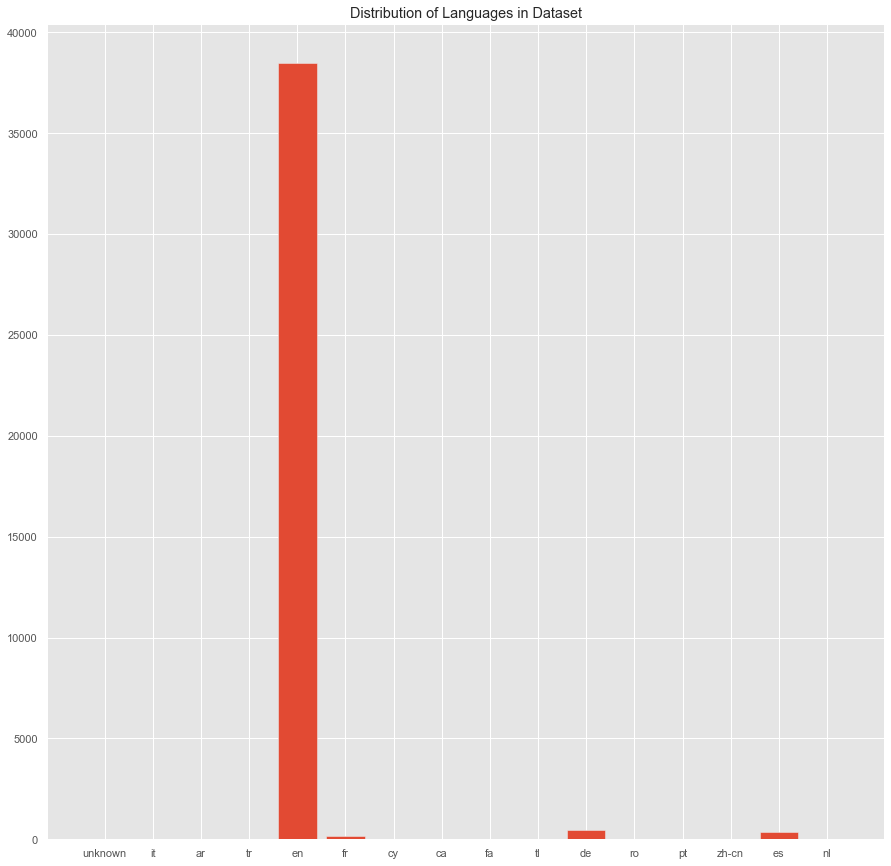

In [170]:
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()


We will be dropping any language that is not English. Attempting to translate foreign texts gave the following problems:

1. API calls were limited

2. Translating the language may not carry over the true semantic meaning of the text


In [171]:
df = df[df['language'] == 'en'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38494 entries, 0 to 44633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             38494 non-null  object
 1   doi                  38494 non-null  object
 2   abstract             38494 non-null  object
 3   body_text            38494 non-null  object
 4   authors              38494 non-null  object
 5   title                38494 non-null  object
 6   journal              38494 non-null  object
 7   abstract_summary     38494 non-null  object
 8   abstract_word_count  38494 non-null  int64 
 9   body_word_count      38494 non-null  int64 
 10  body_unique_words    38494 non-null  int64 
 11  language             38494 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [172]:
#Download the spacy bio parser

from IPython.utils import io
with io.capture_output() as captured:
   !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz

In [173]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [174]:
#NLP 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg  # model downloaded in previous step

### Stopwords

Part of the preprocessing will be finding and removing stopwords (common words that will act as noise in the clustering step).

In [175]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords

['an',
 'itself',
 'whereby',
 'ca',
 'them',
 'under',
 'whole',
 'therein',
 'such',
 'very',
 'least',
 'front',
 'put',
 'much',
 'still',
 'seemed',
 '‘ll',
 'show',
 'could',
 'never',
 'thence',
 'everywhere',
 'towards',
 '‘ve',
 'up',
 'is',
 'however',
 'anything',
 'about',
 'latter',
 'when',
 'each',
 'whether',
 'hereafter',
 'and',
 'almost',
 'while',
 'several',
 'toward',
 'twelve',
 'with',
 'sixty',
 'third',
 'yourselves',
 'wherever',
 'same',
 'how',
 'using',
 'out',
 'five',
 'many',
 'its',
 'nobody',
 'name',
 'throughout',
 'where',
 'it',
 'now',
 'bottom',
 'than',
 'whenever',
 'else',
 'her',
 'those',
 'anyhow',
 'hundred',
 'become',
 'he',
 'always',
 'unless',
 'since',
 'first',
 '’s',
 "'ll",
 'another',
 'his',
 'sometimes',
 'him',
 'call',
 'me',
 'only',
 'give',
 'next',
 'anywhere',
 'of',
 'both',
 'us',
 'nothing',
 'whither',
 'there',
 'via',
 'i',
 'serious',
 'top',
 'former',
 'please',
 'have',
 'afterwards',
 'mine',
 'became',
 'ove

Now the above stopwords are used in everyday english text. Research papers will often frequently use words that don't actually contribute to the meaning and are not considered everyday stopwords.

Thank you Daniel Wolffram for the idea.
#### Cite: [Custom Stop Words | Topic Modeling: Finding Related Articles](https://www.kaggle.com/danielwolffram/topic-modeling-finding-related-articles)

In [176]:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

### Removal of Frequent words
So this step is to remove the frequent words in the given corpus. If we use something like tfidf, this is automatically taken care of.

In [177]:
from collections import Counter
cnt = Counter()
for text in df["body_text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(40)

[('the', 6677344),
 ('of', 4993542),
 ('and', 4275635),
 ('in', 2896450),
 ('to', 2889173),
 ('a', 1917021),
 ('with', 1332320),
 ('for', 1274106),
 ('is', 1264033),
 ('that', 1090460),
 ('.', 1054590),
 ('The', 892844),
 ('as', 887573),
 ('was', 834319),
 ('by', 797136),
 ('were', 778710),
 ('are', 734190),
 ('be', 713633),
 ('on', 653284),
 ('from', 602502),
 ('or', 593592),
 ('an', 433762),
 ('have', 430447),
 ('at', 428422),
 ('this', 420286),
 ('not', 405017),
 ('et', 388287),
 ('In', 384591),
 ('which', 371353),
 ('patients', 325308),
 ('has', 317238),
 ('can', 313244),
 ('also', 295855),
 ('been', 294437),
 (',', 277409),
 ('we', 266091),
 ('it', 260277),
 ('may', 257772),
 ('COVID-19', 249947),
 ('their', 249640)]

In [178]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(30)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["body_text"].apply(lambda text: remove_freqwords(text))


In [179]:
df["body_text"]

0        According to current live statistics at the ti...
2        Infections are an important cause of morbidity...
4        Introduction and objectives: The COVID-19 outb...
5        Feline infectious peritonitis (FIP) is a fatal...
6        The 4th Industrial Revolution technology is be...
                               ...                        
44628    In the United States, X-linked agammaglobuline...
44629    Chagas disease is a neglected tropical disease...
44630    A sound approach: Hydroxychloroquine reduces m...
44632    per high power fi eld and , 25 squamous epithe...
44633    Olfaction is the sense of smell. It is one of ...
Name: body_text, Length: 38494, dtype: object

In [180]:
df["text_wo_stopfreq"]

0        According current live statistics time editing...
2        Infections important cause morbidity, mortalit...
4        Introduction objectives: COVID-19 outbreak has...
5        Feline infectious peritonitis (FIP) fatal chro...
6        4th Industrial Revolution technology being app...
                               ...                        
44628    United States, X-linked agammaglobulinemia (XL...
44629    Chagas disease neglected tropical disease caus...
44630    A sound approach: Hydroxychloroquine reduces m...
44632    per high power fi eld , 25 squamous epithelial...
44633    Olfaction sense smell. It one chemical senses....
Name: text_wo_stopfreq, Length: 38494, dtype: object

### Removal of Rare words
This is very similar to previous preprocessing step but we will remove the rare words from the corpus.

In [181]:
#cnt.most_common()[:-500-1:-1]

In [182]:
# n_rare_words = 10
# RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
# def remove_rarewords(text):
#     """custom function to remove the rare words"""
#     return " ".join([word for word in str(text).split() if word not in RAREWORDS])

# df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
# df.head()

### Lemmatization

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

In [183]:
import nltk
#nltk.download('wordnet')

In [184]:
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()
#def lemmatize_words(text):
#    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])#
#df["text_lemmatized"] = df["text_wo_stopfreq"].apply(lambda text: lemmatize_words(text))
#df.head()

Now let us redo the lemmatization process for our dataset.

In [185]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Seyf_GOUMEIDA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [186]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df["text_wo_stopfreq"].apply(lambda text: lemmatize_words(text))


In [187]:
df.head()

paper_id                           doi  \
0  0000028b5cc154f68b8a269f6578f21e31f62977             10.1002/bjs.11940   
2  0000b93c66f991236db92dc16fa6db119b27ca12   10.1007/978-3-030-36358-1_7   
4  000122a9a774ec76fa35ec0c0f6734e7e8d0c541     10.1016/j.rec.2020.08.002   
5  0001418189999fea7f7cbe3e82703d71c85a6fe5  10.1016/j.vetmic.2006.11.026   
6  000159d40045de3f55c9ddd5d99d760d679d4910  10.1007/978-3-030-64769-8_13   

                                            abstract  \
0                                                      
2                                                      
4  Introduction and objectives: The COVID-19 outb...   
5  Feline infectious peritonitis virus (FIPV) pos...   
6  The CCTV surveillance center (below to "Center...   

                                           body_text  \
0  According to current live statistics at the ti...   
2  Infections are an important cause of morbidity...   
4  Introduction and objectives: The COVID-19 outb...   
5  Feline infectious peritonitis (FIP) is a fatal...   
6  The 4th Industrial Revolution technology is be...   

                                             authors  \
0   Tsarkov, Petr V..  Zubayraeva, Albina A.. <br...   
2                George, Biju.  Bhattacharya, Sanjay   
4   Rodríguez-Leor, Oriol.  Cid-Álvarez, Belén. <...   
5   Cornelissen, E..  Dewerchin, H. L..  Van Hamm...   
6                       Lim, Donghyun.  Park, Deawoo   

                                               title  \
0    “Multi‐faceted” COVID‐19: Russian<br>experience   
2   Infections in Hematopoietic Stem Cell<br>Tran...   
4   Impact of COVID-19 on ST-segment elevation<br...   
5   Absence of surface expression of feline<br>in...   
6   AI Analysis of Illegal Parking Data at Seocho...   

                                             journal  \
0                                          Br J Surg   
2           Contemporary Bone Marrow Transplantation   
4                          Rev Esp Cardiol (Engl Ed)   
5                            Veterinary Microbiology   
6  Data Science and Digital Transformation in the...   

                                    abstract_summary  abstract_word_count  \
0                                      Not provided.                    0   
2                                      Not provided.                    0   
4   Introduction and objectives: The COVID-19<br>...                  286   
5   Feline infectious peritonitis virus (FIPV)<br...                  165   
6   The CCTV surveillance center (below to<br>"Ce...                  148   

   body_word_count  body_unique_words language  \
0              635                349       en   
2             6824               2232       en   
4             3508               1297       en   
5             2071                756       en   
6             1981                696       en   

                                    text_wo_stopfreq  \
0  According current live statistics time editing...   
2  Infections important cause morbidity, mortalit...   
4  Introduction objectives: COVID-19 outbreak has...   
5  Feline infectious peritonitis (FIP) fatal chro...   
6  4th Industrial Revolution technology being app...   

                                     text_lemmatized  
0  According current live statistic time edit let...  
2  Infections important cause morbidity, mortalit...  
4  Introduction objectives: COVID-19 outbreak hav...  
5  Feline infectious peritonitis (FIP) fatal chro...  
6  4th Industrial Revolution technology be apply ...

### Removal of URLs

In [188]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [189]:
df["text_lemmatized_no_url"] = df["text_lemmatized"].apply(lambda text: remove_urls(text))
df.head()
    

paper_id                           doi  \
0  0000028b5cc154f68b8a269f6578f21e31f62977             10.1002/bjs.11940   
2  0000b93c66f991236db92dc16fa6db119b27ca12   10.1007/978-3-030-36358-1_7   
4  000122a9a774ec76fa35ec0c0f6734e7e8d0c541     10.1016/j.rec.2020.08.002   
5  0001418189999fea7f7cbe3e82703d71c85a6fe5  10.1016/j.vetmic.2006.11.026   
6  000159d40045de3f55c9ddd5d99d760d679d4910  10.1007/978-3-030-64769-8_13   

                                            abstract  \
0                                                      
2                                                      
4  Introduction and objectives: The COVID-19 outb...   
5  Feline infectious peritonitis virus (FIPV) pos...   
6  The CCTV surveillance center (below to "Center...   

                                           body_text  \
0  According to current live statistics at the ti...   
2  Infections are an important cause of morbidity...   
4  Introduction and objectives: The COVID-19 outb...   
5  Feline infectious peritonitis (FIP) is a fatal...   
6  The 4th Industrial Revolution technology is be...   

                                             authors  \
0   Tsarkov, Petr V..  Zubayraeva, Albina A.. <br...   
2                George, Biju.  Bhattacharya, Sanjay   
4   Rodríguez-Leor, Oriol.  Cid-Álvarez, Belén. <...   
5   Cornelissen, E..  Dewerchin, H. L..  Van Hamm...   
6                       Lim, Donghyun.  Park, Deawoo   

                                               title  \
0    “Multi‐faceted” COVID‐19: Russian<br>experience   
2   Infections in Hematopoietic Stem Cell<br>Tran...   
4   Impact of COVID-19 on ST-segment elevation<br...   
5   Absence of surface expression of feline<br>in...   
6   AI Analysis of Illegal Parking Data at Seocho...   

                                             journal  \
0                                          Br J Surg   
2           Contemporary Bone Marrow Transplantation   
4                          Rev Esp Cardiol (Engl Ed)   
5                            Veterinary Microbiology   
6  Data Science and Digital Transformation in the...   

                                    abstract_summary  abstract_word_count  \
0                                      Not provided.                    0   
2                                      Not provided.                    0   
4   Introduction and objectives: The COVID-19<br>...                  286   
5   Feline infectious peritonitis virus (FIPV)<br...                  165   
6   The CCTV surveillance center (below to<br>"Ce...                  148   

   body_word_count  body_unique_words language  \
0              635                349       en   
2             6824               2232       en   
4             3508               1297       en   
5             2071                756       en   
6             1981                696       en   

                                    text_wo_stopfreq  \
0  According current live statistics time editing...   
2  Infections important cause morbidity, mortalit...   
4  Introduction objectives: COVID-19 outbreak has...   
5  Feline infectious peritonitis (FIP) fatal chro...   
6  4th Industrial Revolution technology being app...   

                                     text_lemmatized  \
0  According current live statistic time edit let...   
2  Infections important cause morbidity, mortalit...   
4  Introduction objectives: COVID-19 outbreak hav...   
5  Feline infectious peritonitis (FIP) fatal chro...   
6  4th Industrial Revolution technology be apply ...   

                              text_lemmatized_no_url  
0  According current live statistic time edit let...  
2  Infections important cause morbidity, mortalit...  
4  Introduction objectives: COVID-19 outbreak hav...  
5  Feline infectious peritonitis (FIP) fatal chro...  
6  4th Industrial Revolution technology be apply ...

### Removal of HTML Tags

In [190]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [191]:
df["text_lemmatized_url_html"] = df["text_lemmatized_no_url"].apply(lambda text: remove_html(text))
df.head()

paper_id                           doi  \
0  0000028b5cc154f68b8a269f6578f21e31f62977             10.1002/bjs.11940   
2  0000b93c66f991236db92dc16fa6db119b27ca12   10.1007/978-3-030-36358-1_7   
4  000122a9a774ec76fa35ec0c0f6734e7e8d0c541     10.1016/j.rec.2020.08.002   
5  0001418189999fea7f7cbe3e82703d71c85a6fe5  10.1016/j.vetmic.2006.11.026   
6  000159d40045de3f55c9ddd5d99d760d679d4910  10.1007/978-3-030-64769-8_13   

                                            abstract  \
0                                                      
2                                                      
4  Introduction and objectives: The COVID-19 outb...   
5  Feline infectious peritonitis virus (FIPV) pos...   
6  The CCTV surveillance center (below to "Center...   

                                           body_text  \
0  According to current live statistics at the ti...   
2  Infections are an important cause of morbidity...   
4  Introduction and objectives: The COVID-19 outb...   
5  Feline infectious peritonitis (FIP) is a fatal...   
6  The 4th Industrial Revolution technology is be...   

                                             authors  \
0   Tsarkov, Petr V..  Zubayraeva, Albina A.. <br...   
2                George, Biju.  Bhattacharya, Sanjay   
4   Rodríguez-Leor, Oriol.  Cid-Álvarez, Belén. <...   
5   Cornelissen, E..  Dewerchin, H. L..  Van Hamm...   
6                       Lim, Donghyun.  Park, Deawoo   

                                               title  \
0    “Multi‐faceted” COVID‐19: Russian<br>experience   
2   Infections in Hematopoietic Stem Cell<br>Tran...   
4   Impact of COVID-19 on ST-segment elevation<br...   
5   Absence of surface expression of feline<br>in...   
6   AI Analysis of Illegal Parking Data at Seocho...   

                                             journal  \
0                                          Br J Surg   
2           Contemporary Bone Marrow Transplantation   
4                          Rev Esp Cardiol (Engl Ed)   
5                            Veterinary Microbiology   
6  Data Science and Digital Transformation in the...   

                                    abstract_summary  abstract_word_count  \
0                                      Not provided.                    0   
2                                      Not provided.                    0   
4   Introduction and objectives: The COVID-19<br>...                  286   
5   Feline infectious peritonitis virus (FIPV)<br...                  165   
6   The CCTV surveillance center (below to<br>"Ce...                  148   

   body_word_count  body_unique_words language  \
0              635                349       en   
2             6824               2232       en   
4             3508               1297       en   
5             2071                756       en   
6             1981                696       en   

                                    text_wo_stopfreq  \
0  According current live statistics time editing...   
2  Infections important cause morbidity, mortalit...   
4  Introduction objectives: COVID-19 outbreak has...   
5  Feline infectious peritonitis (FIP) fatal chro...   
6  4th Industrial Revolution technology being app...   

                                     text_lemmatized  \
0  According current live statistic time edit let...   
2  Infections important cause morbidity, mortalit...   
4  Introduction objectives: COVID-19 outbreak hav...   
5  Feline infectious peritonitis (FIP) fatal chro...   
6  4th Industrial Revolution technology be apply ...   

                              text_lemmatized_no_url  \
0  According current live statistic time edit let...   
2  Infections important cause morbidity, mortalit...   
4  Introduction objectives: COVID-19 outbreak hav...   
5  Feline infectious peritonitis (FIP) fatal chro...   
6  4th Industrial Revolution technology be apply ...   

                            text_lemmatized_url_html  
0  According current live statistic time edit let...  
2 

### Let's take a look at word count in the papers

In [192]:
import seaborn as sns

count    38494.000000
mean      3539.245467
std       3234.998084
min          1.000000
25%       1482.250000
50%       2939.000000
75%       4641.000000
max      92031.000000
Name: body_word_count, dtype: float64

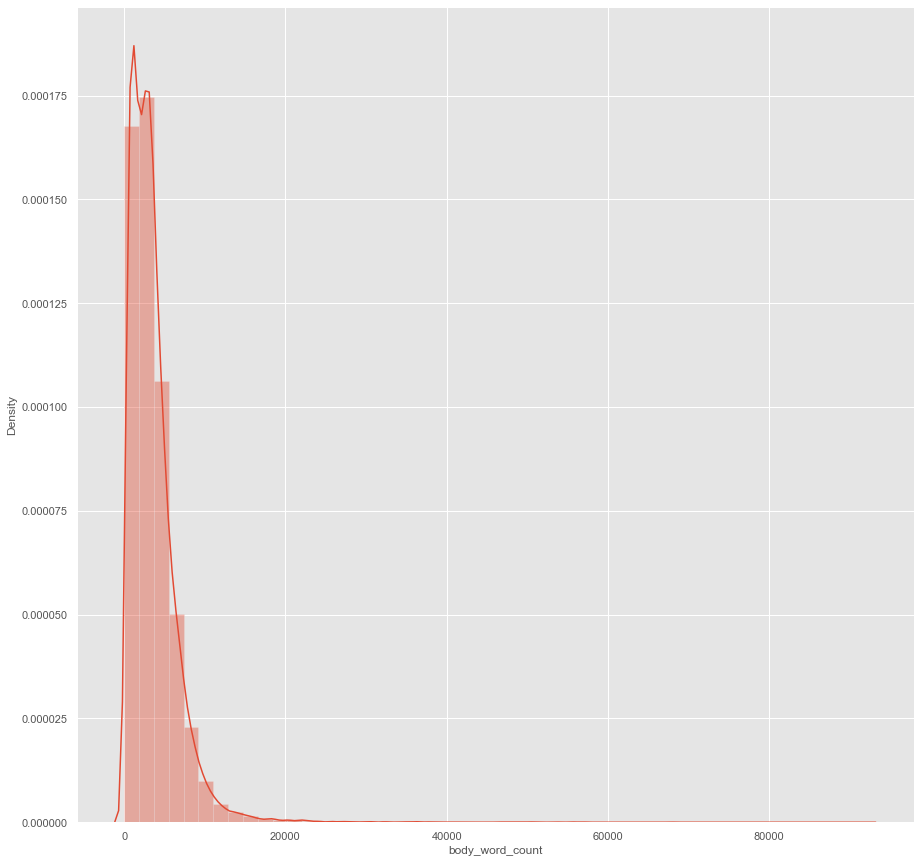

In [193]:
sns.distplot(df['body_word_count'])
df['body_word_count'].describe()

count    38494.000000
mean      1160.477113
std        744.928209
min          1.000000
25%        661.000000
50%       1063.000000
75%       1482.000000
max      19457.000000
Name: body_unique_words, dtype: float64

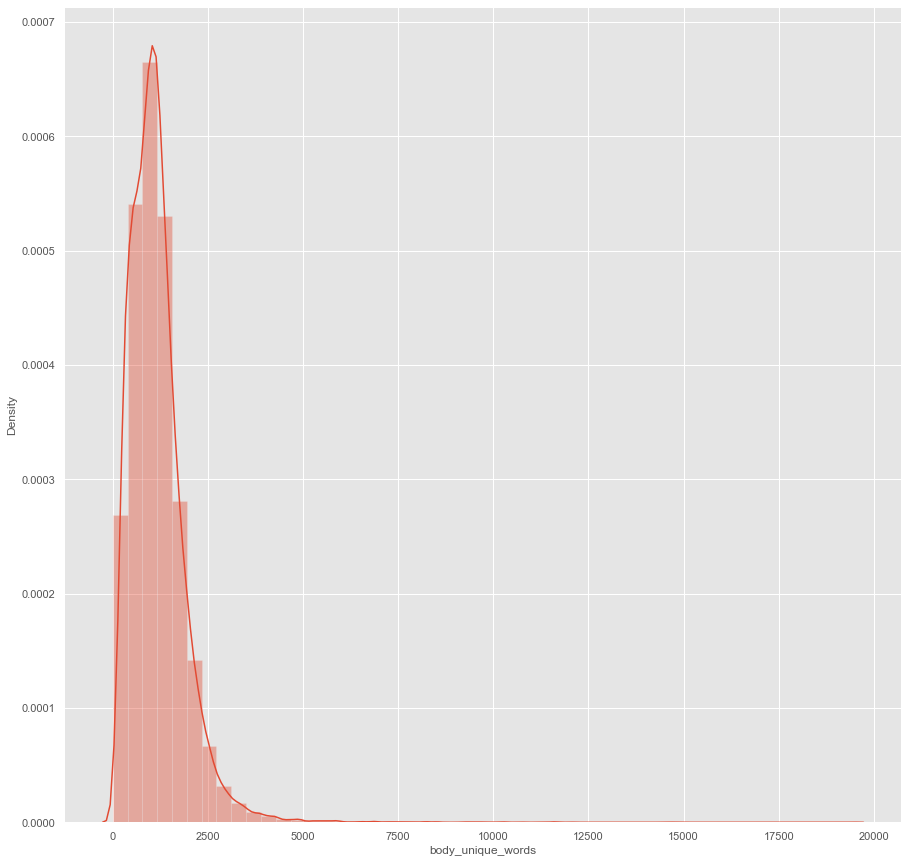

In [194]:
sns.distplot(df['body_unique_words'])
df['body_unique_words'].describe()

These two plots give us a good idea of the content we are dealing with. Most papers are about 5000 words in length. The long tails in both plots are caused by outliers. In fact, ~98% of the papers are under 20,000 words in length while a select few are over 200,000! <br><br>

# Vectorization

Now that we have pre-processed the data, it is time to convert it into a format that can be handled by our algorithms. For this purpose we will be using tf-idf. This will convert our string formatted data into a measure of how important each word is to the instance out of the literature as a whole.

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    global vectorizer 
    X = vectorizer.fit_transform(text)
    return X

Vectorize our data. We will be clustering based off the content of the body text. The maximum number of features will be limited. Only the top 2 ** 12 features will be used, eseentially acting as a noise filter. Additionally, more features cause painfully long runtimes.

In [196]:
text = df['text_lemmatized_url_html'].values
vectorizer = TfidfVectorizer(max_features= 2 ** 12)
X = vectorize(text, 2 ** 12)
X.shape
print(X)

  (0, 1270)	0.0367108343185106
  (0, 3437)	0.030512793656345752
  (0, 3104)	0.04096096311531158
  (0, 914)	0.047535556790473325
  (0, 3218)	0.04068313367127241
  (0, 3741)	0.02236998873122085
  (0, 286)	0.037991016331181064
  (0, 2206)	0.047229501055229495
  (0, 1044)	0.022580202696079275
  (0, 170)	0.036813937415382046
  (0, 2668)	0.028526508701242653
  (0, 3519)	0.03331267268813907
  (0, 3720)	0.015392357292106662
  (0, 2431)	0.029139682602621023
  (0, 2086)	0.04470043445480859
  (0, 2696)	0.033172265749206065
  (0, 4065)	0.03793486082808215
  (0, 1840)	0.03965765425692302
  (0, 3884)	0.02148406415410299
  (0, 980)	0.036742053484937615
  (0, 1022)	0.04196709795225923
  (0, 3068)	0.03125138532144022
  (0, 356)	0.062078324137618095
  (0, 4002)	0.01656099895908626
  (0, 253)	0.033803528435621906
  :	:
  (38493, 1750)	0.009059989338540908
  (38493, 3587)	0.035643349676854175
  (38493, 4051)	0.004915944978915359
  (38493, 3513)	0.006121811231592101
  (38493, 2433)	0.014937342808690211
  (

# PCA  & Clustering

Let's see how much we can reduce the dimensions while still keeping 95% variance. We will apply Principle Component Analysis (PCA) to our vectorized data. The reason for this is that by keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data, and make the clustering problem easier for k-means. Note that X_reduced will only be used for k-means, t-SNE will still use the original feature vector X that was generated through tf-idf on the NLP processed text.

(Thank you Dr. Edward Raff for the suggestion)

In [197]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(38494, 2745)

To separate the literature, k-means will be run on the vectorized text. Given the number of clusters, k, k-means will categorize each vector by taking the mean distance to a randomly initialized centroid. The centroids are updated iteratively.

In [198]:
from sklearn.cluster import KMeans

### How many clusters? 

To find the best k value for k-means we'll look at the distortion at different k values. Distortion computes the sum of squared distances from each point to its assigned center. When distortion is plotted against k there will be a k value after which decreases in distortion are minimal. This is the desired number of clusters.

In [199]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

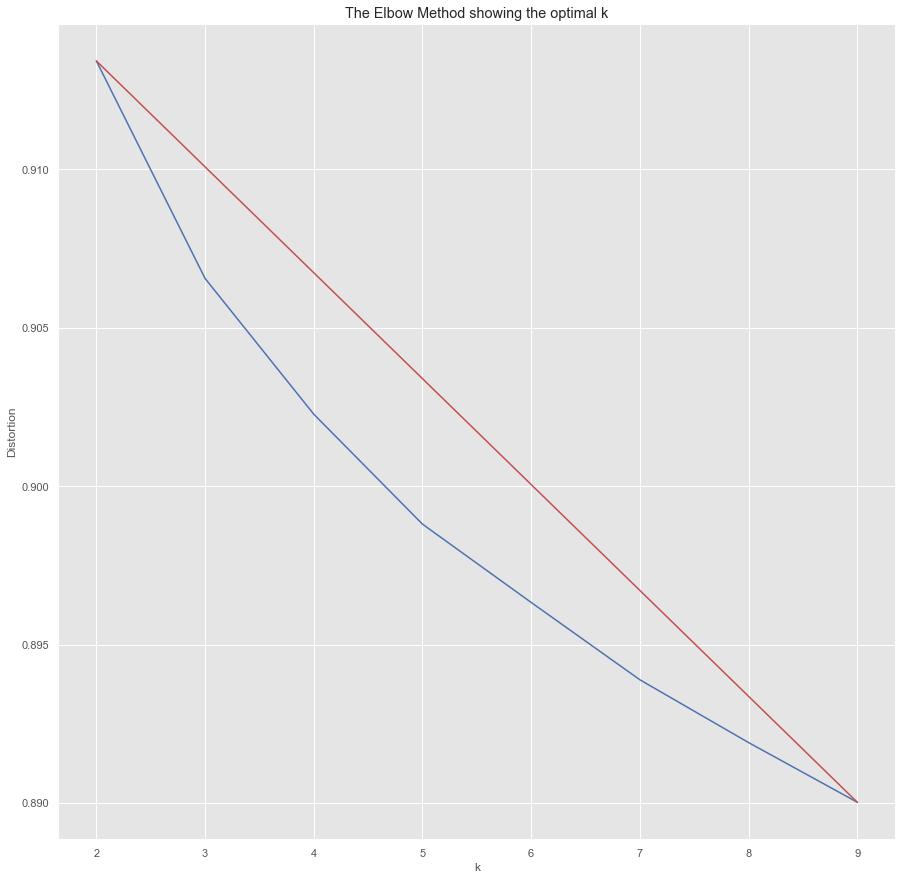

In [200]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In this plot we can see that the better k values are between 18-25. After that, the decrease in distortion is not as significant. For simplicity, we will use k=20

### Run k-means

Now that we have an appropriate k value, we can run k-means on the PCA-processed feature vector (X_reduced). 

In [201]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred
df['y']

0        1
2        2
4        1
5        3
6        2
        ..
44628    1
44629    3
44630    1
44632    2
44633    2
Name: y, Length: 38494, dtype: int32

# Dimensionality Reduction with t-SNE

In [202]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 38494 samples in 140.874s...
[t-SNE] Computed neighbors for 38494 samples in 11895.522s...
[t-SNE] Computed conditional probabilities for sample 1000 / 38494
[t-SNE] Computed conditional probabilities for sample 2000 / 38494
[t-SNE] Computed conditional probabilities for sample 3000 / 38494
[t-SNE] Computed conditional probabilities for sample 4000 / 38494
[t-SNE] Computed conditional probabilities for sample 5000 / 38494
[t-SNE] Computed conditional probabilities for sample 6000 / 38494
[t-SNE] Computed conditional probabilities for sample 7000 / 38494
[t-SNE] Computed conditional probabilities for sample 8000 / 38494
[t-SNE] Computed conditional probabilities for sample 9000 / 38494
[t-SNE] Computed conditional probabilities for sample 10000 / 38494
[t-SNE] Computed conditional probabilities for sample 11000 / 38494
[t-SNE] Computed conditional probabilities for sample 12000 / 38494
[t-SNE] Computed conditional probabilities 

So that step took a while! Let's take a look at what our data looks like when compressed to 2 dimensions. 

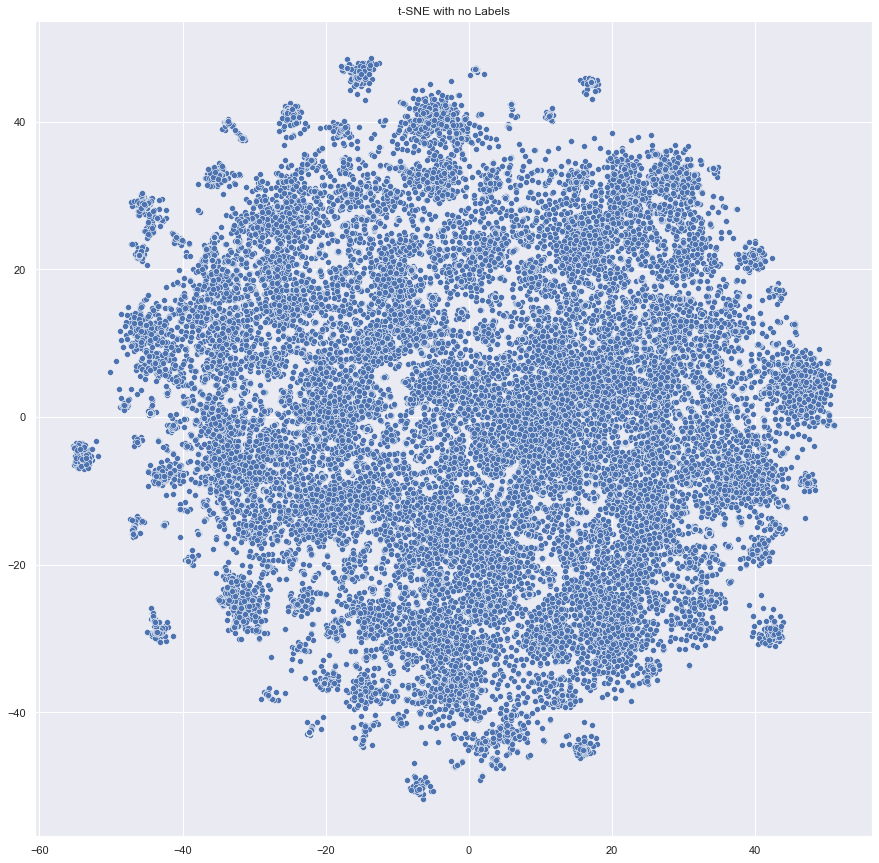

In [203]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")
plt.show()

This looks pretty bland. There are some clusters we can immediately detect, but the many instances closer to the center are harder to separate. t-SNE did a good job at reducing the dimensionality, but now we need some labels. Let's use the clusters found by k-means as labels. This will help visually separate different concentrations of topics.

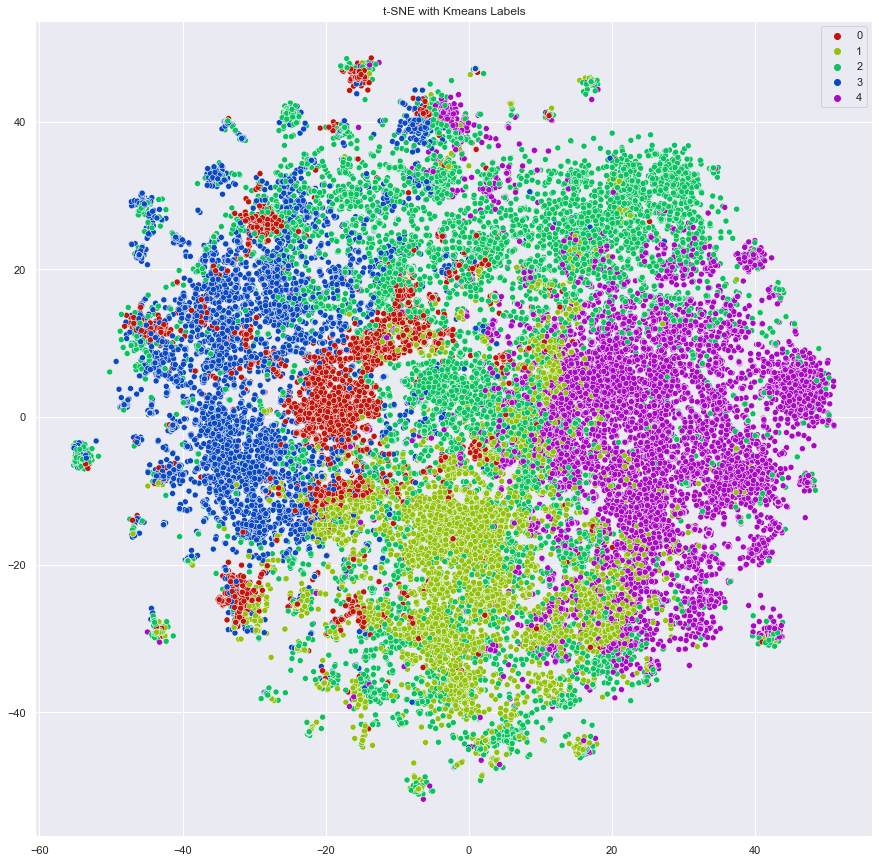

In [204]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(5, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

The labeled plot gives better insight into how the papers are grouped. It is interesting that both k-means and t-SNE are able to agree on certain clusters even though they were ran independetly. The location of each paper on the plot was determined by t-SNE while the label (color) was determined by k-means. If we look at a particular part of the plot where t-SNE has grouped many articles forming a cluster, it is likely that k-means is uniform in the labeling of this cluster (most of the cluster is the same color). This behavior shows that structure within the literature can be observed and measured to some extent. 

Now there are other cases where the colored labels (k-means) are spread out on the plot (t-SNE). This is a result of t-SNE and k-means finding different connections in the higher dimensional data. The topics of these papers often intersect so it hard to cleanly separate them. This effect can be observed in the formation of subclusters on the plot. These subclusters are a conglomeration of different k-means labels but may share some connection determined by t-SNE.

This organization of the data does not act as a simple search engine. The clustering + dimensionality reduction is performed on the mathematical similarities of the publications. As an unsupervised approach, the algorithms may even find connections that were unnaparent to humans. This may highlight hidden shared information and advance further research.


# NMF

In [205]:
import en_ner_bc5cdr_md
nlp = spacy.load("en_ner_bc5cdr_md")

In [206]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
nmf = NMF(n_components=20, random_state=1,
          alpha=.1, l1_ratio=.5).fit(X)

In [207]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5, 4, figsize=(30, 60), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [208]:
#vectorizer = TfidfVectorizer(max_features= 2 ** 12)


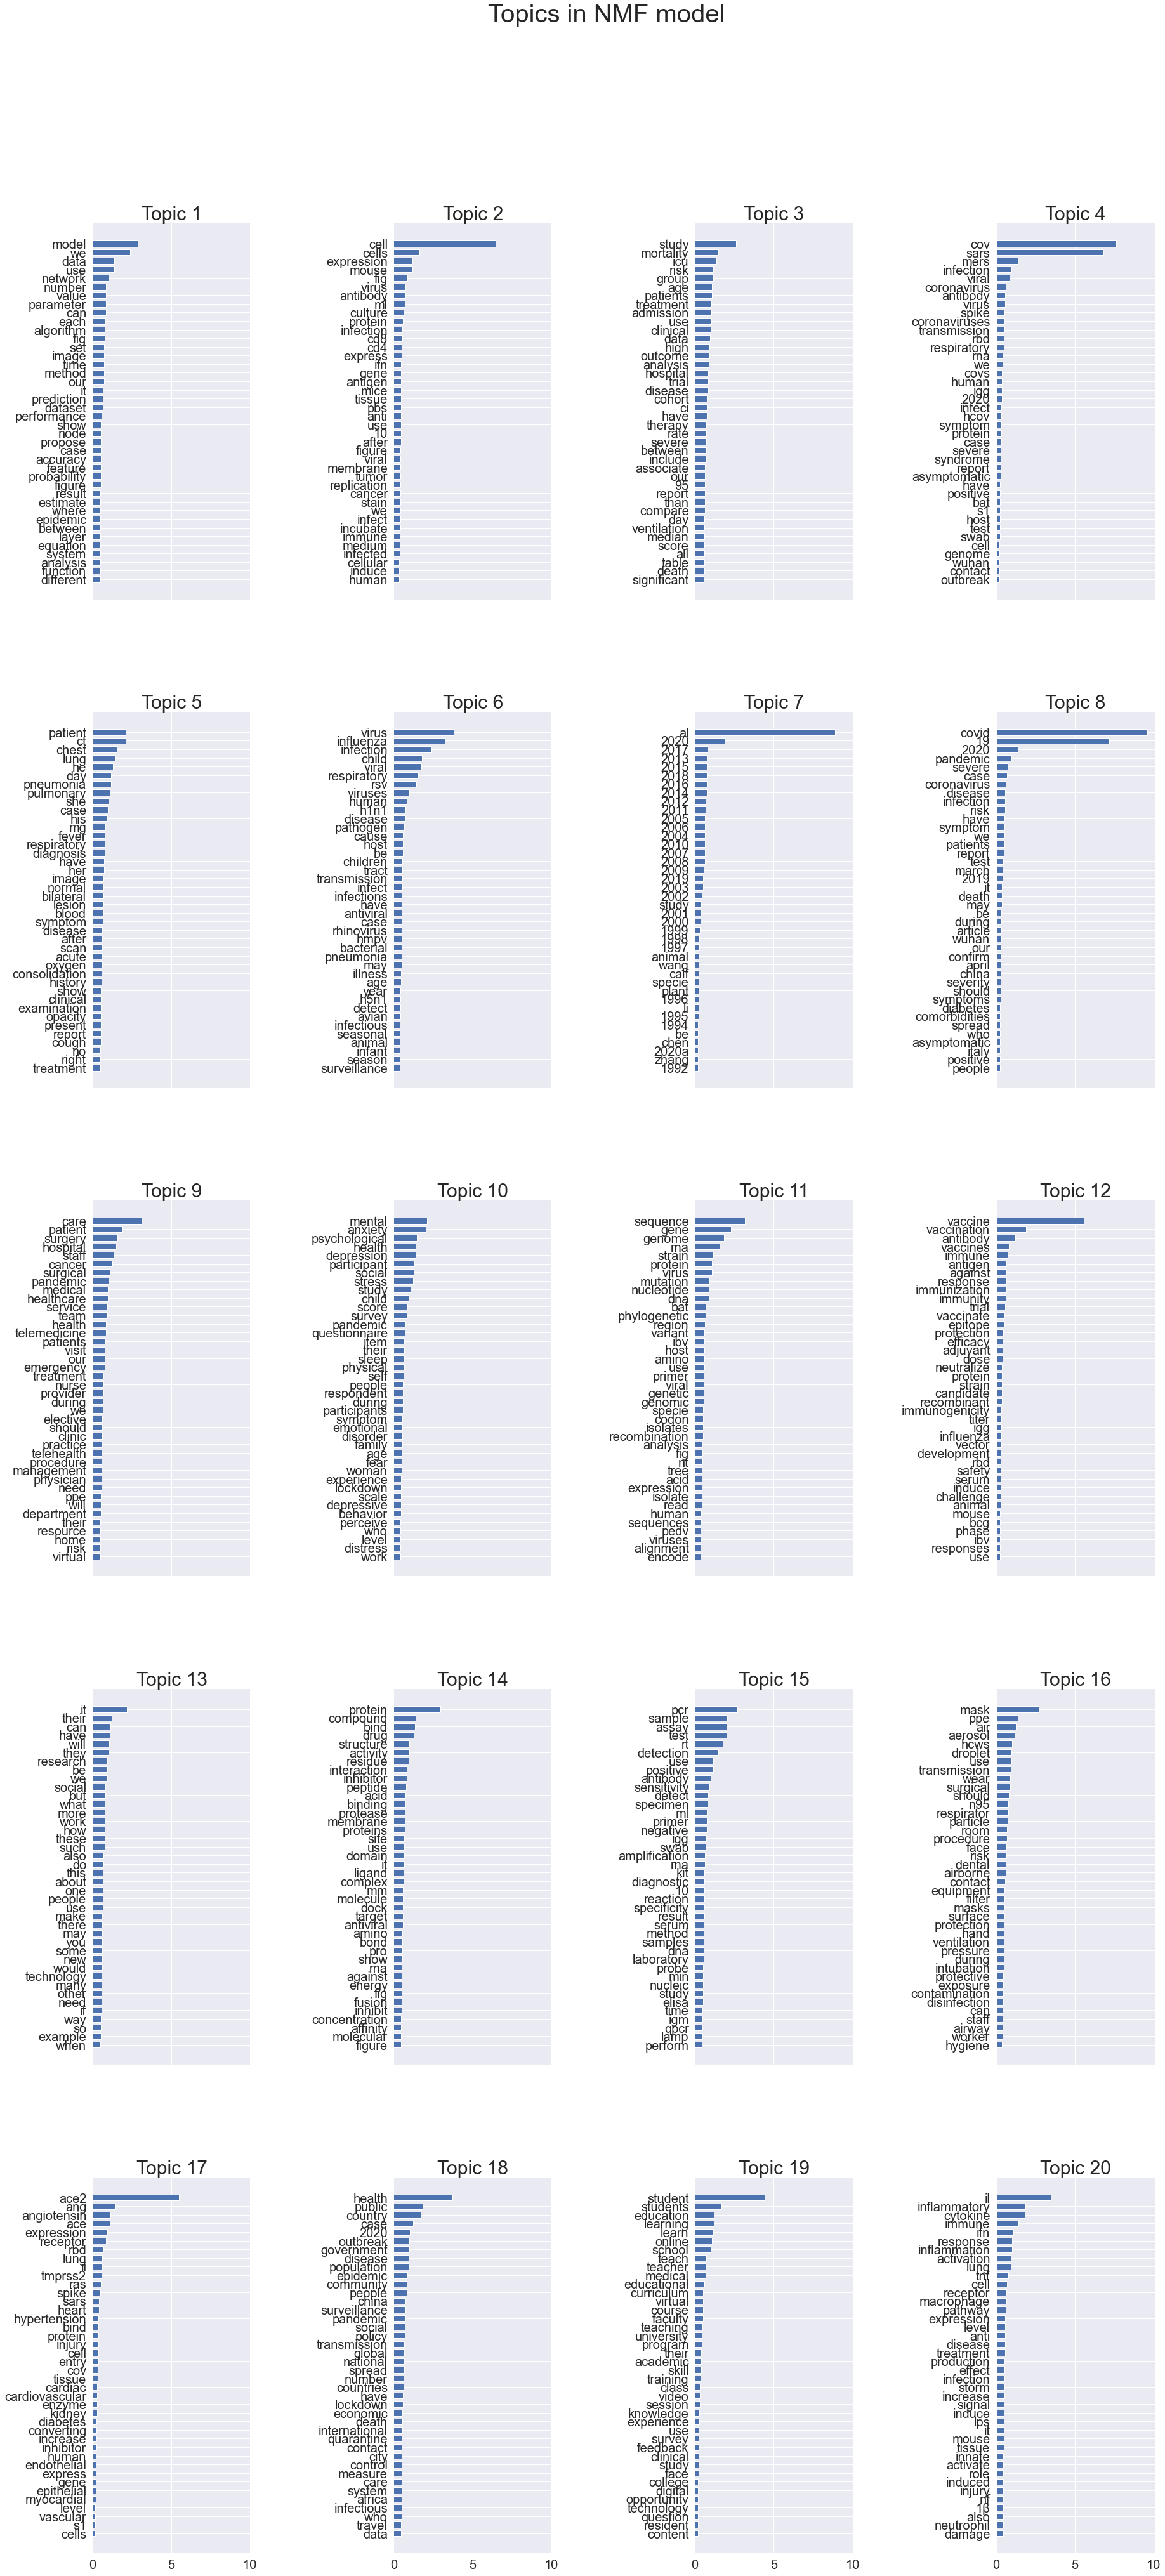

In [209]:
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, 40,
               'Topics in NMF model')

In [210]:
all_keywords = []
for topic_idx, topic in enumerate(nmf.components_):
    #top words = 100
    top_features_ind = topic.argsort()[:-100 - 1:-1]
    top_features = [tfidf_feature_names[i] for i in top_features_ind]
    all_keywords.append(top_features)

In [211]:
for num_clus in range(0,20):
    print("*************Cluster ",num_clus,"*********************")
    str1 = ','.join(all_keywords[num_clus])
    doc = nlp(str1)
    print(str1)
    print("-------------------------------------------")
    TERM_LIST = [e.text for e in doc.ents if (e.label_ == "DISEASE")]
    print("TERM_LIST : " ,TERM_LIST )
    print("")

*************Cluster  0 *********************
model,we,data,use,network,number,value,parameter,can,each,algorithm,fig,set,image,time,method,our,it,prediction,dataset,performance,show,node,propose,case,accuracy,feature,probability,figure,result,estimate,where,epidemic,between,layer,equation,system,analysis,function,different,rate,input,two,base,then,simulation,for,user,variable,all,distribution,predict,information,train,classification,section,give,obtain,average,approach,learn,class,order,table,matrix,models,size,machine,individual,dynamic,this,one,error,represent,problem,output,graph,process,paper,point,if,state,assume,solution,population,datasets,test,define,apply,learning,compute,structure,score,random,cluster,see,fit,consider,first,mean
-------------------------------------------
TERM_LIST :  []

*************Cluster  1 *********************
cell,cells,expression,mouse,fig,virus,antibody,ml,culture,protein,infection,cd8,cd4,express,ifn,gene,antigen,mice,tissue,pbs,anti,use,10,after,

it,their,can,have,will,they,research,be,we,social,but,what,more,work,how,these,such,also,do,this,about,one,people,use,make,there,may,you,some,new,would,technology,many,other,need,if,way,so,example,when,them,information,should,change,process,human,development,life,policy,food,world,take,my,crisis,issue,see,well,even,business,provide,time,science,economic,article,approach,all,system,his,most,practice,into,through,political,who,become,he,market,support,and,only,digital,our,could,question,society,experience,decision,scientific,must,state,focus,project,term,like,knowledge,now,problem,help,create,user
-------------------------------------------
TERM_LIST :  []

*************Cluster  13 *********************
protein,compound,bind,drug,structure,activity,residue,interaction,inhibitor,peptide,acid,binding,protease,membrane,proteins,site,use,domain,it,ligand,complex,mm,molecule,dock,target,antiviral,amino,bond,pro,show,rna,against,energy,fig,fusion,inhibit,concentration,affinity,molecular,figure

# LDA

In [212]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

tf = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
tff = tf.fit_transform(text)
lda = LatentDirichletAllocation(n_components=20, max_iter=10, learning_method='online', random_state=42)
lda.fit(tff)


LatentDirichletAllocation(learning_method='online', n_components=20,
                          random_state=42)

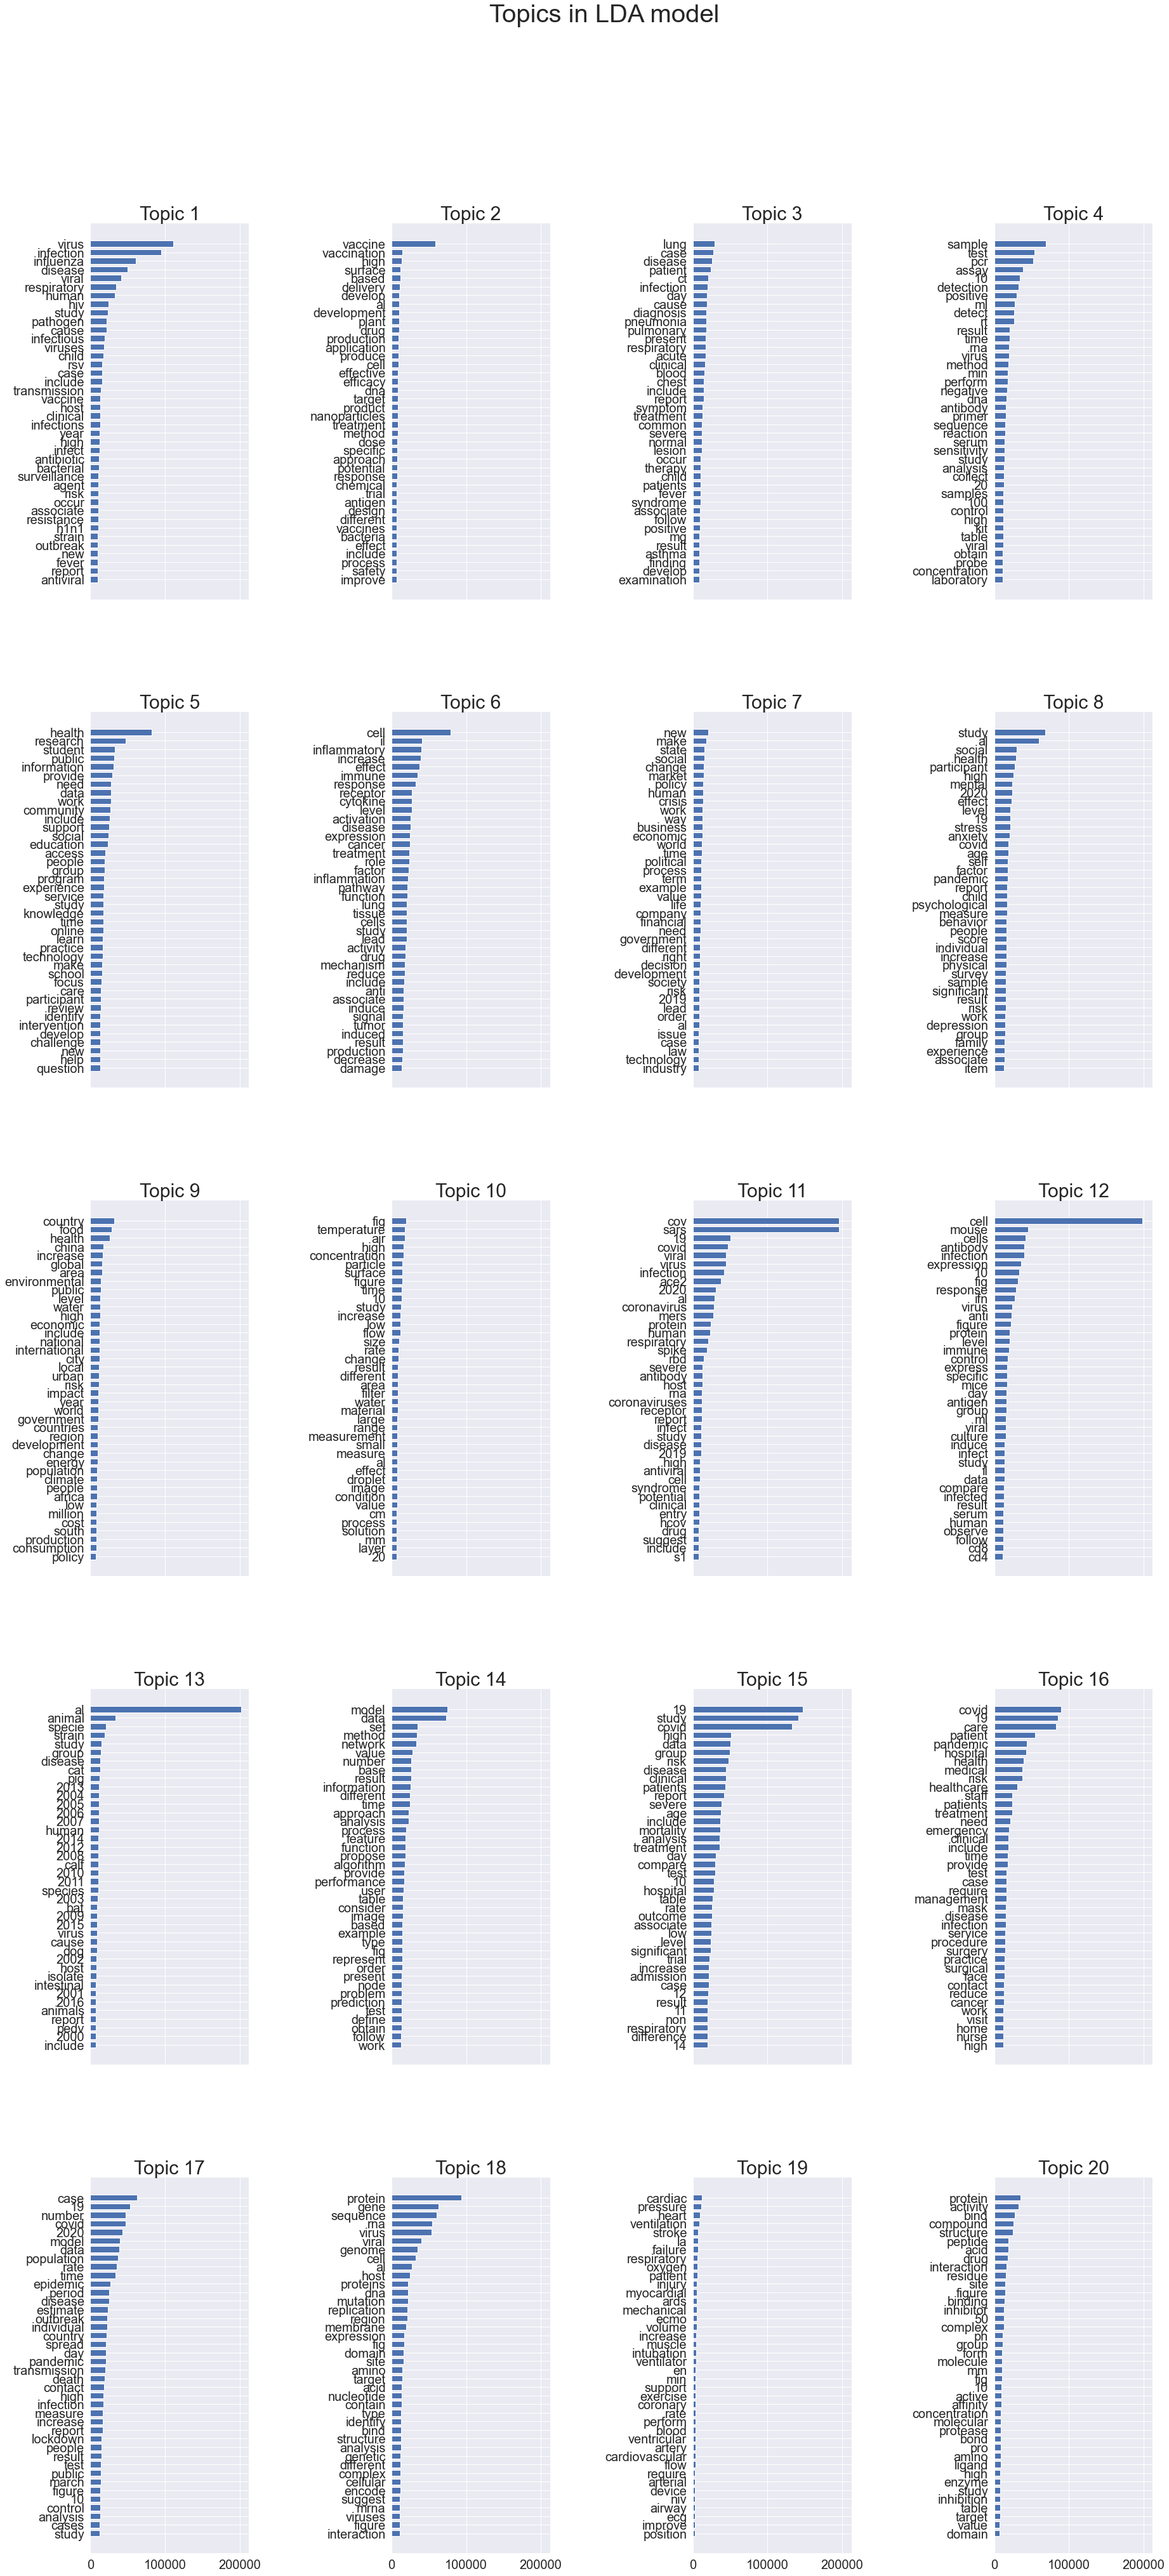

In [213]:
tf_feature_names = tf.get_feature_names()
plot_top_words(lda, tf_feature_names, 40, 'Topics in LDA model')

In [214]:
all_keywords = []
for topic_idx, topic in enumerate(nmf.components_):
    #top words = 100
    top_features_ind = topic.argsort()[:-100 - 1:-1]
    top_features = [tfidf_feature_names[i] for i in top_features_ind]
    all_keywords.append(top_features)

In [215]:
for num_clus in range(0,20):
    print("*************Cluster ",num_clus,"*********************")
    str1 = ','.join(all_keywords[num_clus])
    doc = nlp(str1)
    print(str1)
    print("-------------------------------------------")
    TERM_LIST = [e.text for e in doc.ents if (e.label_ == "DISEASE")]
    print("TERM_LIST : " ,TERM_LIST )
    print("")

*************Cluster  0 *********************
model,we,data,use,network,number,value,parameter,can,each,algorithm,fig,set,image,time,method,our,it,prediction,dataset,performance,show,node,propose,case,accuracy,feature,probability,figure,result,estimate,where,epidemic,between,layer,equation,system,analysis,function,different,rate,input,two,base,then,simulation,for,user,variable,all,distribution,predict,information,train,classification,section,give,obtain,average,approach,learn,class,order,table,matrix,models,size,machine,individual,dynamic,this,one,error,represent,problem,output,graph,process,paper,point,if,state,assume,solution,population,datasets,test,define,apply,learning,compute,structure,score,random,cluster,see,fit,consider,first,mean
-------------------------------------------
TERM_LIST :  []

*************Cluster  1 *********************
cell,cells,expression,mouse,fig,virus,antibody,ml,culture,protein,infection,cd8,cd4,express,ifn,gene,antigen,mice,tissue,pbs,anti,use,10,after,

pcr,sample,assay,test,rt,detection,use,positive,antibody,sensitivity,detect,specimen,ml,primer,negative,igg,swab,amplification,rna,kit,diagnostic,10,reaction,specificity,result,serum,method,samples,dna,laboratory,probe,min,nucleic,study,elisa,time,igm,qpcr,lamp,perform,antigen,μl,testing,real,diagnosis,concentration,collect,clinical,false,ct,extraction,day,culture,value,100,control,nasopharyngeal,specimens,after,dilution,copies,acid,each,target,viral,µl,all,high,rapid,multiplex,buffer,blood,assays,serological,table,load,standard,low,performance,specific,cat,obtain,saliva,calf,molecular,collection,diagnostics,temperature,sensitive,two,manufacturer,extract,20,reverse,50,95,asymptomatic,copy,mm,screen
-------------------------------------------
TERM_LIST :  []

*************Cluster  15 *********************
mask,ppe,air,aerosol,hcws,droplet,use,transmission,wear,surgical,should,n95,respirator,particle,room,procedure,face,risk,dental,airborne,contact,equipment,filter,masks,surface,protecti

# LSA

In [216]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [217]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0] ," ",end='')
    print(" ")

Topic 0: 
covid  19  cov  have  sars  use  it   
Topic 1: 
cell  protein  virus  cov  al  sars  viral   
Topic 2: 
covid  cov  19  sars  infection  severe  respiratory   
Topic 3: 
cov  sars  sequence  mers  2020  rna  virus   
Topic 4: 
pcr  sample  test  use  ct  rt  respiratory   
Topic 5: 
virus  vaccine  influenza  infection  health  child  care   
Topic 6: 
al  2020  virus  influenza  covid  study  child   
Topic 7: 
covid  19  cell  sequence  protein  pcr  rna   
Topic 8: 
al  patient  care  surgery  surgical  he  staff   
Topic 9: 
student  study  participant  anxiety  mental  cov  sars   
Topic 10: 
protein  sequence  drug  vaccine  study  trial  genome   
Topic 11: 
vaccine  al  antibody  vaccination  trial  use  drug   
Topic 12: 
vaccine  student  covid  ct  antibody  19  vaccination   
Topic 13: 
compound  mg  health  drug  he  ml  protein   
Topic 14: 
pcr  health  il  assay  sample  detection  rt   
Topic 15: 
student  virus  influenza  viral  drug  covid  compound   
To

In [218]:
all_keywords = []
for topic_idx, topic in enumerate(svd_model.components_):
    #top words = 100
    top_features_ind = topic.argsort()[:-100 - 1:-1]
    top_features = [tfidf_feature_names[i] for i in top_features_ind]
    all_keywords.append(top_features)


In [219]:
for num_clus in range(0,19):
    print("*************Cluster ",num_clus,"*********************")
    str1 = ','.join(all_keywords[num_clus])
    doc = nlp(str1)
    print(str1)
    print("-------------------------------------------")
    TERM_LIST = [e.text for e in doc.ents if (e.label_ == "DISEASE")]
    print("TERM_LIST : " ,TERM_LIST )
    print("")

*************Cluster  0 *********************
covid,19,cov,have,sars,use,it,study,we,al,cell,infection,virus,be,disease,health,these,may,case,can,also,data,2020,patient,risk,high,our,all,viral,their,protein,test,care,more,pandemic,clinical,report,show,other,include,treatment,respiratory,such,patients,during,time,this,who,hospital,day,increase,result,between,model,than,one,group,there,but,severe,level,10,will,after,sample,should,no,they,number,human,fig,response,system,analysis,do,most,two,age,symptom,however,rate,pcr,population,vaccine,effect,lung,social,positive,control,well,figure,low,could,drug,antibody,people,medical,only,find,table
-------------------------------------------
TERM_LIST :  ['infection', 'pandemic']

*************Cluster  1 *********************
cell,protein,virus,cov,al,sars,viral,gene,rna,expression,sequence,antibody,cells,mouse,fig,ace2,bind,immune,il,host,infection,receptor,assay,dna,ml,human,ifn,replication,genome,anti,acid,membrane,vaccine,proteins,strain,targe

protein,sequence,drug,vaccine,study,trial,genome,rna,gene,bind,treatment,care,residue,mortality,mutation,amino,compound,risk,clinical,structure,ace2,site,icu,inhibitor,therapy,acid,influenza,cancer,score,viral,group,dna,nucleotide,proteins,host,child,domain,interaction,strain,outcome,protease,patients,virus,binding,target,antiviral,dock,analysis,structural,include,diabetes,activity,hcq,peptide,use,participant,ligand,variant,hiv,molecular,viruses,associate,bond,codon,replication,genetic,complex,medication,enzyme,ibv,terminal,adverse,hydroxychloroquine,phylogenetic,age,be,antibiotic,admission,cardiac,efficacy,review,meta,outcomes,cardiovascular,cohort,remdesivir,vaccination,spike,molecule,identify,pro,mental,high,therapeutic,cleavage,ci,ace,database,region,genomic
-------------------------------------------
TERM_LIST :  ['cancer', 'diabetes']

*************Cluster  11 *********************
vaccine,al,antibody,vaccination,trial,use,drug,treatment,dose,against,igg,cancer,surgery,compound,c

# Topic Modeling on Each Cluster

Now we will attempt to find the most significant words in each clusters. K-means clustered the articles but did not label the topics. Through topic modeling we will find out what the most important terms for each cluster are. This will add more meaning to the cluster by giving keywords to quickly identify the themes of the cluster.

For topic modeling, we will use LDA (Latent Dirichlet Allocation). In LDA, each document can be described by a distribution of topics and each topic can be described by a distribution of words[.](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158)

In [220]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

First we will create 20 vectorizers, one for each of our cluster labels

In [221]:
vectorizers = []
    
for ii in range(0, 5):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

Now we will vectorize the data from each of our clusters

In [222]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'text_lemmatized_url_html']))
        #d'ou vient df['y'] =   y_pred = kmeans.fit_predict(X_reduced)      df['y'] = y_pred       df['y']
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [223]:
len(vectorized_data)

5

Topic modeling will be performed through the use of Latent Dirichlet Allocation (LDA). This is a generative statistical model that allows sets of words to be explained by a shared topic

# Topic modeling on each cluster using LDA : 

In [224]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 6

lda_models = []
for ii in range(0, 5):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    

For each cluster, we had created a correspoding LDA model in the previous step. We will now fit_transform all the LDA models on their respective cluster vectors

In [225]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

Extracts the keywords from each cluster

In [226]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=20):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

Append list of keywords for a single cluster to 2D list of length NUM_TOPICS_PER_CLUSTER

In [227]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

In [228]:
for i in range(0,5):
    print(all_keywords[i])

['cell', 'ace', 'antibody', 'sequence', 'assay', 'protein', 'bind', 'sars-cov-', 'expression', 'clinical', 'vaccine', 'lung', 'virus', 'case', 'drug', 'genome', 'transmission', 'response', 'receptor', 'igg', 'structure', 'interaction', 'cells', 'immune', 'treatment', 'detection', 'result', 'increase', 'rbd', 'mutation', 'severe', 'activity', 'sars-cov', 'patients', 'mers-cov', 'symptom', 'serum', 'il-', 'sars', 'level', 'cytokine', 'spike', 'test', 'orf', 'nsp', 'residue', 'site', 'respiratory', 'fig', 'day', 'detect', 'target', 'figure', 'protease', 'complex', 'host', 'high', 'patient', 'report', 'trial', 'analysis', 'gene', 'health', 'positive', 'variant', 'contact', 'rna', 'sample', 'coronavirus', 'bat', 'coronaviruses', 'disease', 'region', 'covid-', 'human', 'outbreak', 'include', 'animal', 'viral']
['patient', 'mortality', 'group', 'health', 'care', 'case', 'treatment', 'analysis', 'age', 'report', 'respiratory', 'day', 'admission', 'cell', 'use', 'infection', 'il-', 'hospital', 

In [229]:
for num_clus in range(0,5):
    print("*************Cluster ",num_clus,"*********************")
    str1 = ','.join(all_keywords[num_clus])
    doc = nlp(str1)
    print(str1)
    print("-------------------------------------------")
    TERM_LIST = [e.text for e in doc.ents if (e.label_ == "DISEASE")]
    print("TERM_LIST : " ,TERM_LIST )
    print("")

*************Cluster  0 *********************
cell,ace,antibody,sequence,assay,protein,bind,sars-cov-,expression,clinical,vaccine,lung,virus,case,drug,genome,transmission,response,receptor,igg,structure,interaction,cells,immune,treatment,detection,result,increase,rbd,mutation,severe,activity,sars-cov,patients,mers-cov,symptom,serum,il-,sars,level,cytokine,spike,test,orf,nsp,residue,site,respiratory,fig,day,detect,target,figure,protease,complex,host,high,patient,report,trial,analysis,gene,health,positive,variant,contact,rna,sample,coronavirus,bat,coronaviruses,disease,region,covid-,human,outbreak,include,animal,viral
-------------------------------------------
TERM_LIST :  ['coronaviruses,disease']

*************Cluster  1 *********************
patient,mortality,group,health,care,case,treatment,analysis,age,report,respiratory,day,admission,cell,use,infection,il-,hospital,number,outcome,increase,symptom,compare,acute,sars-cov-,table,icu,cancer,population,data,present,level,study,drug,cyt

# Topic modeling on each cluster using NMF : 

In [230]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 6

nmf_models = []
for ii in range(0, 5):
    # nmf
    nmf = NMF(n_components=NUM_TOPICS_PER_CLUSTER, random_state=1,alpha=.1, l1_ratio=.5)
    nmf_models.append(nmf)
    
nmf_models[0]

NMF(alpha=0.1, l1_ratio=0.5, n_components=6, random_state=1)

In [231]:
clusters_nmf_data = []

for current_cluster, nmf in enumerate(nmf_models):
    print("Current Cluster: " + str(current_cluster))
    if vectorized_data[current_cluster] != None:
        clusters_nmf_data.append((nmf.fit_transform(vectorized_data[current_cluster])))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4


In [232]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=20):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [233]:
all_keywords = []
for current_vectorizer, nmf in enumerate(nmf_models):
    # print("Current Cluster: " + str(current_vectorizer))
    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(nmf, vectorizers[current_vectorizer]))

In [234]:
for i in range(0,5):
    print(all_keywords[i])

['sars-cov-', 'ace', 'test', 'sars-cov', 'viral', 'disease', 'vaccine', 'assay', 'clinical', 'positive', 'detection', 'cells', 'nsp', 'treatment', 'virus', 'structure', 'immune', 'response', 'severe', 'mouse', 'result', 'drug', 'detect', 'day', 'antibody', 'respiratory', 'figure', 'expression', 'trial', 'mers-cov', 'include', 'igg', 'domain', 'site', 'target', 'rna', 'host', 'gene', 'case', 'il-', 'residue', 'rt-pcr', 'patients', 'time', 'infect', 'proteins', 'receptor', 'express', 'orf', 'ang', 'sequence', 'bind', 'cell', 'covid-', 'analysis', 'tmprss', 'mink', 'rbd', 'increase', 'spike', 'data', 'report', 'farm', 'fig', 'protein', 'effect', 'lung', 'mutation', 'level', 'animal', 'high', 'table', 'human', 'genome', 'interaction', 'sample', 'observe', 'entry', 'tissue', 'angiotensin', 'affinity']
['study', 'case', 'use', 'group', 'data', 'cell', 'test', 'symptom', 'number', 'il-', 'high', 'care', 'report', 'sars-cov-', 'model', 'infection', 'patients', 'clinical', 'age', 'icu', 'treatm

## travail realisé :
 - detection automatique des noms de maladies
 - construction d'un corpus en utilisant les noms des maladies detectés

In [235]:
for num_clus in range(0,5):
    print("*************Cluster ",num_clus,"*********************")
    str1 = ','.join(all_keywords[num_clus])
    doc = nlp(str1)
    print(str1)
    print("-------------------------------------------")
    TERM_LIST = [e.text for e in doc.ents if (e.label_ == "DISEASE")]
    print("TERM_LIST : " ,TERM_LIST )
    print("")


*************Cluster  0 *********************
sars-cov-,ace,test,sars-cov,viral,disease,vaccine,assay,clinical,positive,detection,cells,nsp,treatment,virus,structure,immune,response,severe,mouse,result,drug,detect,day,antibody,respiratory,figure,expression,trial,mers-cov,include,igg,domain,site,target,rna,host,gene,case,il-,residue,rt-pcr,patients,time,infect,proteins,receptor,express,orf,ang,sequence,bind,cell,covid-,analysis,tmprss,mink,rbd,increase,spike,data,report,farm,fig,protein,effect,lung,mutation,level,animal,high,table,human,genome,interaction,sample,observe,entry,tissue,angiotensin,affinity
-------------------------------------------
TERM_LIST :  []

*************Cluster  1 *********************
study,case,use,group,data,cell,test,symptom,number,il-,high,care,report,sars-cov-,model,infection,patients,clinical,age,icu,treatment,increase,risk,level,patient,analysis,cytokine,pandemic,respiratory,immune,admission,death,positive,surgery,response,include,viral,associate,inflammat

In [ ]:
from Bio import Entrez
from Bio import Medline
import json


MAX_COUNT = 3
for TERM in TERM_LIST:
    Entrez.email = 'A.N.Other@example.com'
    h = Entrez.esearch(db='pubmed', retmax=MAX_COUNT, term=TERM)
    result = Entrez.read(h)
    ids = result['IdList']
    h = Entrez.efetch(db='pubmed', id=ids, rettype='medline', retmode='json')
    records = Medline.parse(h)
    i=0
    for record in records:
        filename="fichier_"+TERM+str(i)+".json"
        json.dump(record, open(".\\new_corpus\\"+filename, 'w'))
        data = json.load(open(".\\new_corpus\\"+filename))
        i=i+1
[(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]

In [104]:
len(all_keywords)

5